In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Problem 2: predicting New York City energy production

**Part 1:** Follow the [instruction I](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Random%20Forests/homework/Instructions%201.docx?raw=true) and [instruction II](https://github.com/um-perez-alvaro/Data-Science-Practice/blob/master/Jupyter%20Notebooks/Random%20Forests/homework/Instructions%202.docx?raw=true) documents to download the weather and energy production datasets. 
Then, run the cell below.

In [11]:
# load weather data
path = 'weather_NYC.csv' 
data = pd.read_csv(path,index_col='DATE',parse_dates=True)

# load energy consumption datasets
df_list = []
file_paths = ['load_NYC_2018.csv', 'load_NYC_2019.csv']
for file in file_paths:
    df = pd.read_csv(file, 
                     usecols = ['RTD End Time Stamp','RTD Actual Load'], 
                     index_col='RTD End Time Stamp', 
                     parse_dates=True)
    df_list.append(df) 
data['LOAD'] = pd.concat(df_list).resample('d').mean() # average energy production
data.head()

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,LOAD
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,NaN,0.00,0.0,0.0,12,18,7,...,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1719.182034
2018-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",15.66,NaN,0.00,0.0,0.0,18,26,13,...,29.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1764.714815
2018-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",8.28,NaN,0.00,0.0,0.0,21,28,12,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699.275172
2018-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",28.19,NaN,0.49,8.0,1.2,25,29,19,...,55.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1722.843750
2018-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",25.05,NaN,0.00,0.0,7.9,15,19,9,...,46.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1773.566997


**Column descriptions:**

| column | description |
| :-- | --: |
| AWND | Average wind speed |
| PGTM | Peak gust time |
| PRCP | Precipitation |
| SNOW | Snowfall |
| SNWD | Snow depth |
| TAVG | Average Temperature |
| TMAX | Maximum temperature |
| TMIN | Minimum temperature |
| WDF2 | Direction of fastest 2-minute wind |
| WDF5 | Direction of fastest 5-second wind |
| WSF2 | Fastest 2-minute wind speed |
| WSF5 | Fastest 5-second wind speed |
| WT01 | Fog, ice fog, or freezing fog (may include heavy fog) |
| WT02 | Heavy fog or heaving freezing fog (not always distinguished from fog) |
| WT03 | Thunder |
| WT04 | Ice pellets, sleet, snow pellets, or small hail |
| WT05 | Hail (may include small hail) |
| WT06 | Glaze or rime |
| WT08 | Smoke or haze |
| WT09 | Blowing or drifting snow | 
| LOAD (**target vector**) | average electricity produced (in Watts) in the CAPITAL zone (see the picture below) |

![zones](nyc_zones.png)

Text(0.5, 0, 'date')

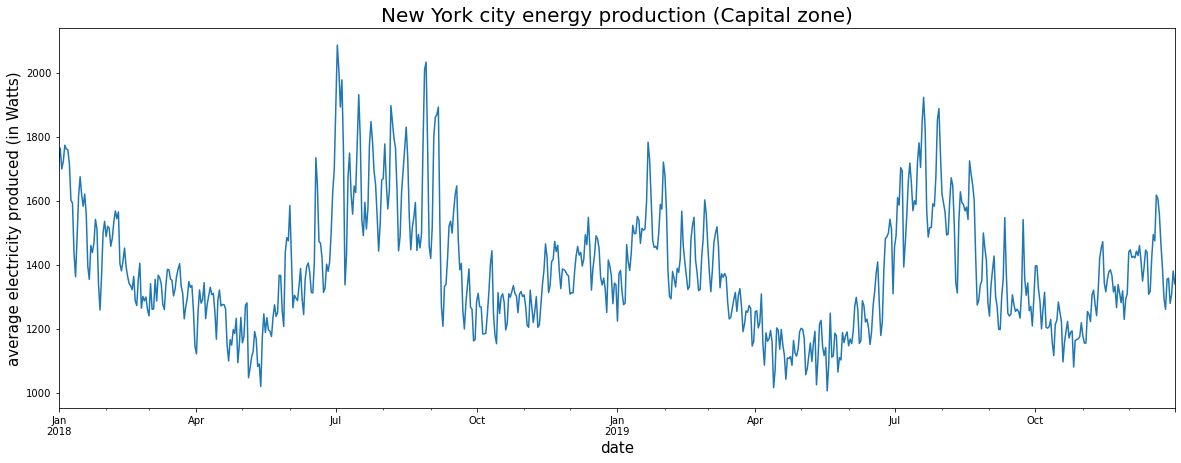

In [12]:
fig, ax = plt.subplots(figsize=(20,7))
data.LOAD.plot(ax=ax)
ax.set_title('New York city energy production (Capital zone)',fontsize=20)
ax.set_ylabel('average electricity produced (in Watts)', fontsize=15)
ax.set_xlabel('date', fontsize=15)

**Part 2:** add new columns  indicating the day of the week, the month, and whether a given date is a holiday.

In [13]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2018-01-01', end='2019-12-31')
df = pd.DataFrame()

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
data['holiday'] = data.index.isin(holidays)
data['month'] = data.index.month
data['day_of_week'] = data.index.dayofweek
#data['day_of_week'] = 
data.head(1)

,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT03,WT04,WT05,WT06,WT08,WT09,LOAD,holiday,month,day_of_week
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",17.67,NaN,0.0,0.0,0.0,12,18,7,...,NaN,NaN,NaN,NaN,NaN,NaN,1719.182034,True,1,0


**Part 3:** define the matrix X and the target vector y (column `LOAD`)

In [14]:
# feature matrix/target vector
X = data.drop(['LOAD', 'STATION', 'NAME'], axis=1)
y = data.LOAD

In [15]:
y

DATE
2018-01-01    1719.182034
2018-01-02    1764.714815
2018-01-03    1699.275172
2018-01-04    1722.843750
2018-01-05    1773.566997
                 ...     
2019-12-27    1358.152740
2019-12-28    1279.878125
2019-12-29    1308.771379
2019-12-30    1380.730392
2019-12-31    1340.607534
Name: LOAD, Length: 730, dtype: float64

The **goal** is to build a random forest pipeline that predicts the energy produced on a given day.
You'll train the regression model on the 2018 data, and test it on the 2019 data.

In [16]:
# training - test split
X_train = X[X.index.year==2018]
y_train = y[y.index.year==2018]
X_test = X[X.index.year==2019]
y_test = y[y.index.year==2019]

**Part 4:** Build a regression pipeline (feature preprocessor + random forest regression model). Then use a grid search to tune the pipeline hyperparameters.

In [17]:
X_train

,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,...,WT02,WT03,WT04,WT05,WT06,WT08,WT09,holiday,month,day_of_week
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01-01,17.67,NaN,0.00,0.0,0.0,12,18,7,310,310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,1,0
2018-01-02,15.66,NaN,0.00,0.0,0.0,18,26,13,260,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1
2018-01-03,8.28,NaN,0.00,0.0,0.0,21,28,12,260,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1,2
2018-01-04,28.19,NaN,0.49,8.0,1.2,25,29,19,340,330.0,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,False,1,3
2018-01-05,25.05,NaN,0.00,0.0,7.9,15,19,9,290,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,8.72,NaN,0.00,0.0,0.0,40,44,37,330,130.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12,3
2018-12-28,13.65,NaN,0.98,0.0,0.0,46,55,43,170,180.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,False,12,4
2018-12-29,15.43,NaN,0.00,0.0,0.0,50,54,39,310,290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,12,5


In [23]:
num_features = ['AWND', 'PRCP', 'SNOW', 'TAVG', 'holiday']
cat_features = ['day_of_week', 'month']

In [28]:
# pipeline
#setup pipe
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

#num_features = X.columns.values
num_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
])

cat_processor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
    
])


feature_processor = ColumnTransformer(transformers=[
    ('num_processor', num_processor, num_features),
    ('cat_processor', cat_processor, cat_features)
])



pipe = Pipeline(steps=[
    ('feature_processor', feature_processor),
    ('forest', RandomForestRegressor(max_depth=5))
])
pipe

Pipeline(steps=[('feature_processor',
                 ColumnTransformer(transformers=[('num_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['AWND', 'PRCP', 'SNOW',
                                                   'TAVG', 'holiday']),
                                                 ('cat_processor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['day_of_week', 'month'])])),
                ('forest', RandomForestRegressor(max_depth=5))])

In [31]:
# grid search
from sklearn.model_selection import GridSearchCV
depth_list = [2,4,8,16,32,64]
param_dic = {'forest__max_depth': depth_list}

grid = GridSearchCV(pipe,param_dic, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1,error_score='raise')
grid.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('feature_processor',
                                        ColumnTransformer(transformers=[('num_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['AWND',
                                                                          'PRCP',
                                                                          'SNOW',
                                                                          'TAVG',
                                                                          'holiday']),
                                                                        ('cat_processor',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['day_of_week',
                                                                          'month'])])),
                                       ('forest',
                                        RandomForestRegressor(max_depth=5))]),
             n_jobs=-1, param_grid={'forest__max_depth': [2, 4, 8, 16, 32, 64]},
             scoring='neg_mean_squared_error', verbose=1)

**Part 5:** Test your model on the 2019 data. 
Plot the `y_test` vector and the prediction.

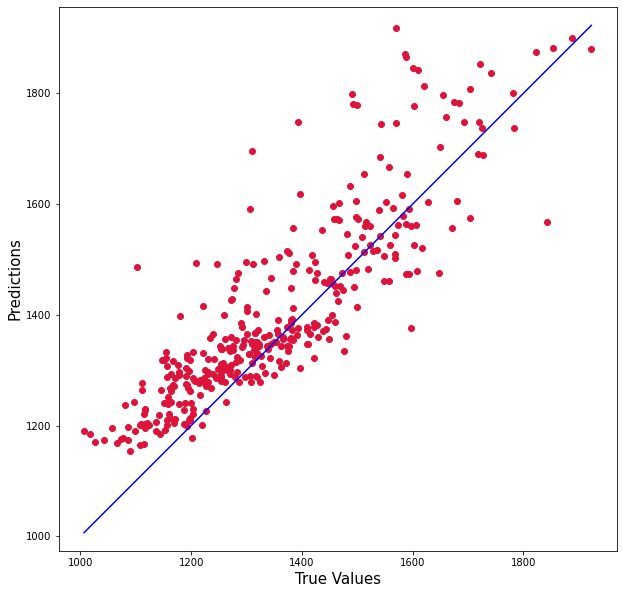

In [32]:
best_pipe = grid.best_estimator_
y_test_pred = best_pipe.predict(X_test)


# plot from SOF https://stackoverflow.com/questions/58410187/how-to-plot-predicted-values-vs-the-true-value
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_test_pred, c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_test_pred), max(y_test))
p2 = min(min(y_test_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()